In [1]:
from qutip import *
import numpy as np
from itertools import product
import random
import matplotlib.pyplot as plt
import simple_exact_diagonalization_routines as spd
from class_PTM_Murao import *

# Functionality tests
Explains the basic functions of the class and verify the correctness

## Test 1: Pauli commutors
1. Demonstrate the formalism of inputs
2. Show that the pauli operations in class_PTM work as intended (compare with QuTiP)

In [2]:
# Initialize class
sys = pauli_transfer_matrix(3)

# Note that the pauli operators are given as tuple
# (0,1,2,3) correspond to id, X, Y, Z
# number of elements must match ntls

op1 = (1,3,2)
op2 = (1,0,1)
ind_com = sys.pauli_commute(op1,op2)
print('Commute by index', ind_com)

qutip_ops = sys.pauli_qutip_ops()
comm_qutip = commutator(qutip_ops[op1], qutip_ops[op2])
print('QuTip produces the same result: ', comm_qutip == -2j*qutip_ops[ind_com[1]])

Commute by index (-2j, (0, 3, 3))
QuTip produces the same result:  True


## Test 2: Pauli transfer matrix equivalence to function

Suppose function f(H) = [D,H], where D is diagonal

In [5]:
import pandas as pd
D = [(1,(3,0,0)), (2,(0,3,0))]
sys = commutator_type_dynamics(D)
sys.show_prob_uw_distribution()

,Index,Gamma
2064,"((2, 0, 0), (1, 0, 0))",0.010417
2324,"((2, 1, 0), (1, 1, 0))",0.010417
2519,"((2, 1, 3), (1, 1, 3))",0.010417
1511,"((1, 1, 3), (2, 1, 3))",0.010417
1771,"((1, 2, 3), (2, 2, 3))",0.010417
...,...,...
394,"((0, 1, 2), (0, 2, 2))",0.020833
2596,"((2, 2, 0), (2, 1, 0))",0.020833
3579,"((3, 1, 3), (3, 2, 3))",0.020833
1499,"((1, 1, 3), (1, 2, 3))",0.020833


In [6]:
pauli_test = (1,2,3)
# Commutator with D
print('f(pauli_test):',sys.f(pauli_test, D))
# Input to gamma
f_ls = []
gamma_uw_dict = sys.gamma_uw_dict
for (u,w) in sys.perm_pairs:
    if u == pauli_test and gamma_uw_dict[(u,w)]!=0:
        f_ls.append((gamma_uw_dict[(u,w)], w))
print('PTM:', f_ls)

f(pauli_test): [(-2j, (2, 2, 3)), (4j, (1, 1, 3))]
PTM: [(4j, (1, 1, 3)), (-2j, (2, 2, 3))]


## Test 3: Sampling routine

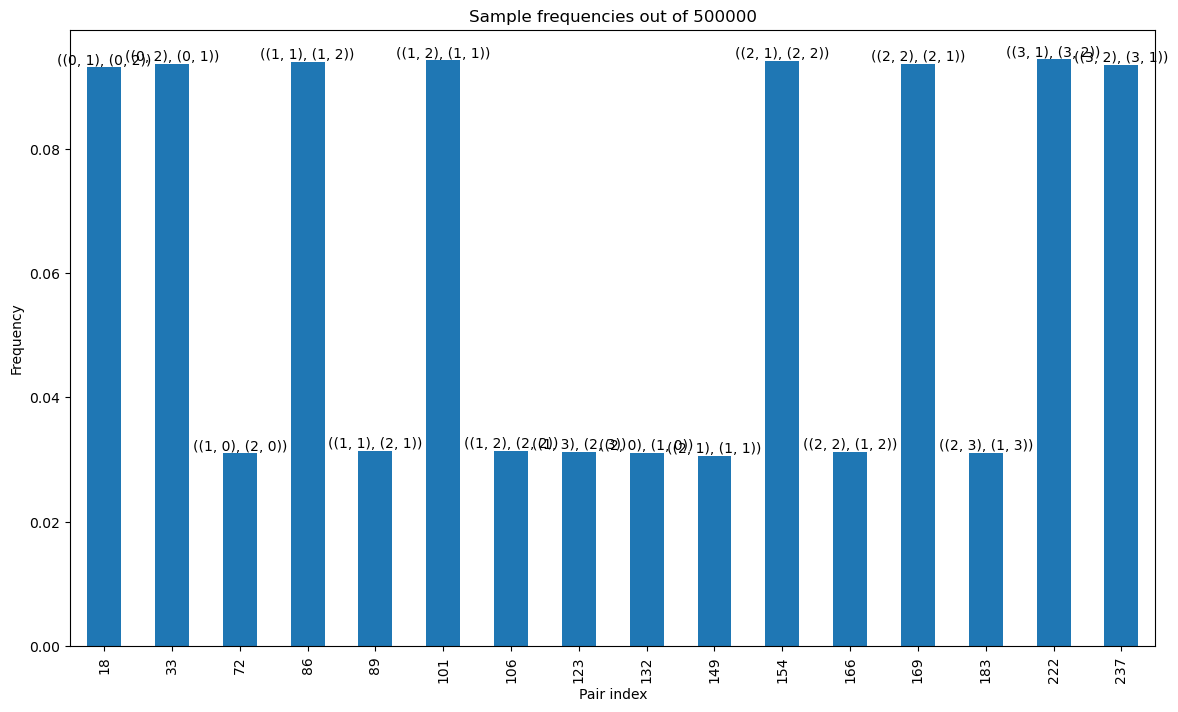

In [ ]:
D = [(3,(0,3)),(1,(3,0))]
sys = pauli_transfer_matrix(D)
(v,vp) = sys.sample_vv()
sampl_uw = sys.sample_uw(multi_sample=True)

## Test 4: Controlled unitaries
1. Check components Hadamard, controlled U correct
2. Result in unitary

In [4]:
D = [(1,(3,0))]
sys = commutator_type_dynamics(D)
sys.run_PTM()
sys.please_be_verbose = True
V_fj = sys.V_fj(sys.sample_vv(), sys.sample_uw())
V_fj

V_fj using (v, vp) = ((3, 3),(3, 2)), (u, w) = ((2, 0),(1, 0)), gamma_uw = 2j
Sign sf = 0


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0. +0.j  -0.5-0.5j  0. +0.j   0. +0.j   0. +0.j  -0.5+0.5j  0. +0.j
   0. +0.j ]
 [ 0.5+0.5j  0. +0.j   0. +0.j   0. +0.j  -0.5+0.5j  0. +0.j   0. +0.j
   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  -0.5+0.5j  0. +0.j   0. +0.j   0. +0.j
   0.5+0.5j]
 [ 0. +0.j   0. +0.j   0.5-0.5j  0. +0.j   0. +0.j   0. +0.j   0.5+0.5j
   0. +0.j ]
 [ 0. +0.j   0.5-0.5j  0. +0.j   0. +0.j   0. +0.j   0.5+0.5j  0. +0.j
   0. +0.j ]
 [-0.5+0.5j  0. +0.j   0. +0.j   0. +0.j   0.5+0.5j  0. +0.j   0. +0.j
   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j   0.5+0.5j  0. +0.j   0. +0.j   0. +0.j
  -0.5+0.5j]
 [ 0. +0.j   0. +0.j  -0.5-0.5j  0. +0.j   0. +0.j   0. +0.j  -0.5+0.5j
   0. +0.j ]]

In [45]:
V_fj * V_fj.dag()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

### Components
1. Hadamard
2. Controlled U

In [17]:
# States for testing
ket_0 = basis(2,0)
ket_1 = basis(2,1)
ket_c = ket_1
ket_t = tensor(ket_0, ket_1)
state = tensor(ket_c, ket_t)

In [26]:
# Hadamard
# Hadamard in class
hadamard_c = tensor(hadamard_transform(1), sys.identity)
state_after = hadamard_c * state
rho_c_class = (state_after * state_after.dag()).ptrace(0)
# Hadamard by qutip
ket_c_after = hadamard_transform(1) * ket_c
rho_c_cal = ket_c_after * ket_c_after.dag()

print(rho_c_cal == rho_c_class)
hadamard_c.ptrace(0)

True


/var/folders/sn/4ym_qb8x0cs_f961d78kvvkc0000gn/T/ipykernel_14157/484745189.py:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  hadamard_c = tensor(hadamard_transform(1), sys.identity)
/var/folders/sn/4ym_qb8x0cs_f961d78kvvkc0000gn/T/ipykernel_14157/484745189.py:7: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  ket_c_after = hadamard_transform(1) * ket_c


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 2.82842712  2.82842712]
 [ 2.82842712 -2.82842712]]

In [28]:
# Controlled U
U = tensor(sigmax(), sigmaz())
state_after = sys.controlled_U(U) * state
rho_t_class = (state_after * state_after.dag()).ptrace([1,2])

# Direct calculation
if ket_c == ket_1:
    ket_t_after = U * ket_t
else:
    ket_t_after = ket_t
rho_t_cal = ket_t_after * ket_t_after.dag()

print(rho_c_cal == rho_c_class)

True


## Test 5: Local restriction

Given the knowledge that H belongs to a subspace $\mathcal{L} (H)$ splanned by the set $\{\sigma_{\vec v}\}_{\vec v \in J}$ for some $J\subset \{0,1,2,3\}^n$, we can set $\gamma_{\vec w, \vec u} = 0$ when $\vec u \notin J$, so as to improve the complexity.

In [2]:
D = [(1,(3,0,3,3))]
sys = commutator_type_dynamics(D)
sys.J = [(1,1,0,0), (0,1,1,0)]
sys.local_restriction = True
sys.run_PTM()
filtered_PTM = sys.filter_out_zeros(sys.gamma_uw_dict)
print(filtered_PTM)
print(sys.beta)
sys.show_prob_uw_distribution()

{((0, 1, 1, 0), (3, 1, 2, 3)): (2+0j), ((1, 1, 0, 0), (2, 1, 3, 3)): (2+0j)}
8.0


,"Index (u,w)",Gamma
5339,"((0, 1, 1, 0), (3, 1, 2, 3))",0.5
20639,"((1, 1, 0, 0), (2, 1, 3, 3))",0.5


In [4]:
H = tensor(sigmax(),sigmax(),qeye(2),qeye(2)) + tensor(qeye(2), sigmax(),sigmax(), qeye(2))
D = tensor([sigmaz(),qeye(2),sigmaz(),sigmaz()])
f_H = 1j * commutator(H, D)
H = sys.normalize_hamiltonian(H)
t = 0.1
allowed_error = 0.2
sys.please_be_verbose = False
U_m = sys.complete_circuit(H, t, allowed_error)
error = sys.approximtion_error(H, U_m, f_H, t)
print(error)

0.14266230187827933


In [11]:
U_m.dims

[[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]]

In [8]:
D = tensor([sigmaz(),qeye(2),sigmaz(),sigmaz()])
f_H = 1j * commutator(H, D)
H_exact = (-1j * f_H * t).expm()
E_exact = H_exact * H * H_exact.dag()
error = (E_exact - E_approx).norm()/2/H.norm()
print(error)

0.020898092975066763


In [16]:
channel = approx
phi_plus = (tensor([basis(2,0) for i in range(sys.ntls+1)]) + tensor([basis(2,1) for i in range(sys.ntls+1)]))/np.sqrt(2)
tensor(tensor(qeye(2), sys.identity), phi_plus * phi_plus.dag()) * tensor(channel, tensor(qeye(2), sys.identity))

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = False
Qobj data =
[[0.49255089+0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 ...
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j ... 0.        +0.j
  0.        +0.j 0.49255089+0.j]]

In [8]:
D = [(1,(3,0))]
H = tensor(sigmax(),sigmax()) + tensor(sigmaz(),qeye(2)) + tensor(qeye(2), sigmaz())
f_H = commutator(H, tensor(sigmaz(),qeye(2)))
t = 0.2
allowed_error = 0.5

sys = commutator_type_dynamics(D)
sys.J = [(1,1), (3,0), (0,3)]
sys.local_restriction = []
sys.run_PTM()
filtered_PTM = sys.filter_out_zeros(sys.gamma_uw_dict)
print(filtered_PTM)
print(sys.beta)

H_exact = (-1j * f_H * t).expm()
nmb_samples = 20
error_list = []
for i in range(nmb_samples):
    approx = sys.complete_circuit(H, t, allowed_error)
    approx_extract = sys.extract_target_op(approx)
    error = sys.error_norm(H_exact, approx_extract)
    error_list.append(error)
print(np.mean(error_list))

{((1, 1), (2, 1)): (2+0j)}
4.0
2.5793902680019873


In [16]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.89442719+0.j         0.        +0.j         0.        +0.j
   0.        -0.4472136j]
 [ 0.        +0.j         0.        +0.j         0.        +0.4472136j
   0.        +0.j       ]
 [ 0.        +0.j         0.        -0.4472136j  0.        +0.j
   0.        +0.j       ]
 [ 0.        +0.4472136j  0.        +0.j         0.        +0.j
  -0.89442719+0.j       ]]